In [161]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


# Let’s run the basic SIR model

In [162]:
# describe the model
def deriv(y, t, N, beta, k, delta):
    S, E, I, R, D, In, Ink, Inm = y
    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N -delta * E
    dIdt = delta * E - k * I
    dRdt = k * I * (1-d)
    dDdt = l * I * d
    dIndt =  dIdt * f * i
    dInkdt = dIndt * w
    dInmdt = dIndt * (1-w)
    
    return dSdt, dEdt, dIdt, dRdt, dDdt, dIndt, dInkdt, dInmdt

# We chose to use relevant data over the spreading of the decease to make a fundamental ond objective model.

# We have split Recovered into two different curves, one for persons who have recovered, R and one for people who have died, D.
# To do that we used the percent for how many people that have died because of Covid in Sweden which was approximately 2% 
# according to Folkhälsomyndigheten by the time we extracted the data.

#We added a group In, intensive care and used the percent 0.01 of all people who have been sick according to Folkhälsomyndigheten
#Then we split this group In into two groups, women and men and we used the percent here as well to show the difference.

#We took the data for intensive care from this website https://experience.arcgis.com/experience/2dc63e26f509468f896ec69476b0dab3 
#The data was downloaded on the 12 of January which might explain any slight differences to current data.




In [163]:



N =  10000000              # Approximately Swedens population
# beta = beta(t)     # beta depends on the time -> harder restrictions smaller beta    
k=1/7 # A person is sick for approximately 7 days.
f=1/10 # 10 days from first day sick to IVA
l=1/9 #dying 9 days after first day sick


delta = 1.0 / 5 # Incubation 
L = 100 # lockdown at L days

#Percents:
d=0.02 #Percent that dies
i=0.01 #percent in IVA
w=0.288 #percent women in IVA

def R_0(t):
    return 5.0 if t < L else 0.9 
def beta(t):
    return R_0(t) * k
# R_0 beror av tiden, alltså hur många en person smittar för att kunna 
# se hur smittspridningen blir om det blir hårdare restriktioner efter en vis dag L.





S0, E0, I0, R0, D0, In0, Ink0, Inm0 = N-1, 1, 0, 0, 0, 0, 0, 0 # initial conditions: one infected, rest susceptible

In [164]:
t = np.linspace(0, 300, 1000) # Grid of time points (in days)


y0 = S0, E0, I0, R0, D0, In0, Ink0, Inm0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, k, delta))
S, E, I, R, D, In, Ink, Inm = ret.T

In [165]:
def plotsir(t, S, E, I, R, D):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Deceased')




  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)  
  plt.show();
    


In [166]:
def plotsir2(t, In, Ink, Inm):
  f, ax = plt.subplots(1,1,figsize=(10,4))
 
  ax.plot(t, In, 'k', alpha=0.7, linewidth=2, label='Intensive care')
  ax.plot(t, Ink, 'c', alpha=0.7, linewidth=2, label='Intensive care women')
  ax.plot(t, Inm, 'y', alpha=0.7, linewidth=2, label='Intensive care men')
  



  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  
  plt.show();

plot the graph

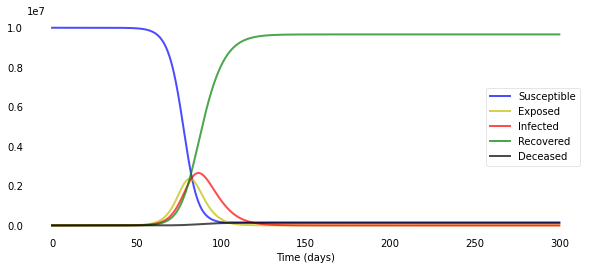

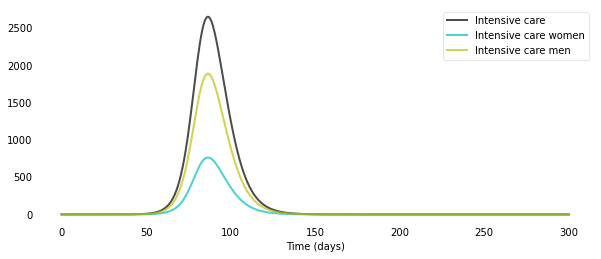

In [167]:

plotsir(t, S, E, I, R, D)
plotsir2(t, In, Ink, Inm)

# When we read about different
# data on Folkhälsomyndigheten we found it intresting that it was a big difference between 
# women and men, 72% men and 28% women, who hade been intensive cared so whe chose to show this in a separate graph. 

